<a href="https://colab.research.google.com/github/Yustira/Analisis_Wisata_Perkemahan_Jabar/blob/main/Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dampak Pandemi Covid-19 Terhadap Industri Pariwisata Perkemahan di Jawa Barat**

In [ ]:
!pip install kaleido
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [43]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from google.colab import drive
from urllib.request import urlopen
from plotly.subplots import make_subplots

In [ ]:
#Untuk melihat plot interactive, jangan running code ini!
import plotly.io as pio
pio.renderers.default = "png"

In [44]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Persiapan Data**

Dataset yang digunakan:

| Nama Data | Sumber |
|-|-|
| Luas Area Perkemahan | Data Panitia |
| Jumlah Pengunjung Perkemahan | Data Panitia |
| Jumlah Tenaga Kerja Perkemahan | Data Panitia |
| Kasus Covid-19 | [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/perkembangan-harian-kasus-terkonfirmasi-positif-covid-19-berdasarkan-kabupatenkota-di-jawa-barat) |
| Vaksinasi | [Kementrian Kesehatan](https://vaksin.kemkes.go.id/#/provinces) |
| Populasi Penduduk Jawa Barat | [BPS Jawa Barat](https://jabar.bps.go.id/indicator/12/133/1/jumlah-penduduk-menurut-kabupaten-kota.html) |

1. Data Luas Area Wisata Perkemahan

In [45]:
dat1 = pd.read_csv('/content/drive/MyDrive/TSDN 21/dataset/Wisata Perkemahan/disparbud-od_perkemahan_berdasarkan_luas_data.csv')
dat1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,luas_area,satuan,tahun
0,0,32,JAWA BARAT,3201,KABUPATEN BOGOR,20.0,HEKTAR,2014
1,1,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,143.0,HEKTAR,2014
2,2,32,JAWA BARAT,3203,KABUPATEN CIANJUR,22.0,HEKTAR,2014
3,3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,29.5,HEKTAR,2014
4,4,32,JAWA BARAT,3205,KABUPATEN GARUT,0.0,HEKTAR,2014


2. Data Jumlah Pengunjung

In [46]:
dat2 = pd.read_csv('/content/drive/MyDrive/TSDN 21/dataset/Wisata Perkemahan/disparbud-od_perkemahan_berdasarkan_jumlah_pengunjung_data.csv')
dat2.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,0,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,8,ORANG,2014
1,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,16963,ORANG,2014
2,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,2265,ORANG,2014
3,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,107550,ORANG,2014
4,4,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,92,ORANG,2014


3. Data Jumlah Tenaga Kerja

In [47]:
dat3 = pd.read_csv('/content/drive/MyDrive/TSDN 21/dataset/Wisata Perkemahan/disparbud-od_jumlah_tenaga_kerja_perkemahan_berdasarkan_jenis_kelamin_data.csv')
dat3.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_tenaga_kerja,satuan,tahun
0,0,32,JAWA BARAT,3201,KABUPATEN BOGOR,PRIA,15,ORANG,2014
1,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA,0,ORANG,2014
2,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PRIA,30,ORANG,2014
3,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,WANITA,7,ORANG,2014
4,4,32,JAWA BARAT,3203,KABUPATEN CIANJUR,PRIA,16,ORANG,2014


Mengecek data null

In [48]:
data = [dat1, dat2, dat3]
for i in data:
    print(i.isnull().sum(), '\n')

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
luas_area              0
satuan                 0
tahun                  0
dtype: int64 

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_wisatawan        0
jumlah_pengunjung      0
satuan                 0
tahun                  0
dtype: int64 

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_kelamin          0
jumlah_tenaga_kerja    0
satuan                 0
tahun                  0
dtype: int64 



# **Analisis Wisata Perkemahan Sebelum Masa Pandemi Covid-19**

In [49]:
luas_area = dat1.groupby('tahun').sum().reset_index()
luas_area = luas_area[['tahun', 'luas_area']]

pengunjung = dat2.groupby('tahun').sum().reset_index()
pengunjung = pengunjung[['tahun', 'jumlah_pengunjung']]

pekerja = dat3.groupby('tahun').sum().reset_index()
pekerja = pekerja[['tahun', 'jumlah_tenaga_kerja']]

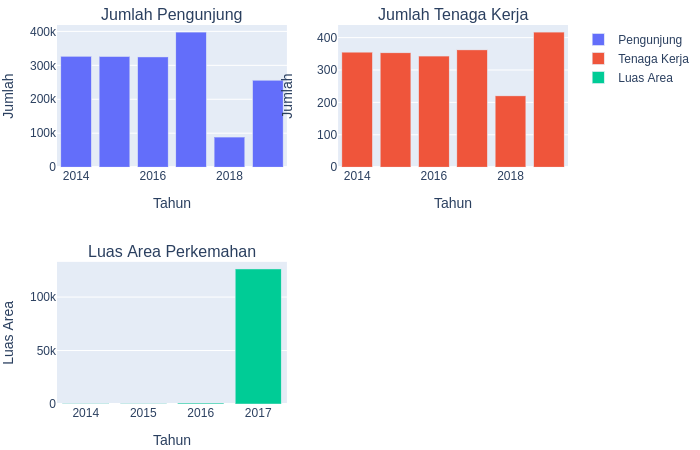

In [50]:
fig = make_subplots(rows=2, cols=2, shared_yaxes=False,
                    subplot_titles=('Jumlah Pengunjung', 
                                    'Jumlah Tenaga Kerja',
                                    'Luas Area Perkemahan'))

fig.add_trace(go.Bar(x=pengunjung.tahun, y=pengunjung.jumlah_pengunjung, name='Pengunjung'), 1, 1)
fig.add_trace(go.Bar(x=pekerja.tahun, y=pekerja.jumlah_tenaga_kerja, name='Tenaga Kerja'), 1, 2)
fig.add_trace(go.Bar(x=luas_area.tahun, y=luas_area.luas_area, name='Luas Area'), 2, 1)

fig.update_xaxes(title_text="Tahun", row=1, col=1)
fig.update_xaxes(title_text="Tahun", row=1, col=2)
fig.update_xaxes(title_text="Tahun", row=2, col=1)
fig.update_yaxes(title_text="Jumlah", row=1, col=1)
fig.update_yaxes(title_text="Jumlah", row=1, col=2)
fig.update_yaxes(title_text="Luas Area", row=2, col=1)

fig.update_layout(margin={"r":5,"t":25,"l":5,"b":5})
                  #width=100*12, height=100*5)

fig.show()

In [51]:
dat1[dat1.tahun == 2017].sort_values('luas_area', ascending=False)[:3][['nama_kabupaten_kota', 'luas_area']].reset_index().drop('index', axis=1)

,nama_kabupaten_kota,luas_area
0,KABUPATEN TASIKMALAYA,125377.0
1,KOTA TASIKMALAYA,368.0
2,KABUPATEN KUNINGAN,148.9


Dari grafik diatas, dalam kondisi normal sebelum masa pandemi covid-19 jumlah pengunjung berada di angka sekitar 300 ribu pengunjung dengan nilai terendah terjadi di tahun 2018 yaitu sebanyak 88.556 pengunjung dan nilai tertinggi terjadi di tahun 2017 dengan pengunjung sebanyak 397.912 orang. Kemudian, untuk jumlah tenaga kerja berada di angka sekitar 350 orang dengan nilai terendah ada di tahun 2018 yaitu sebanyak 220 orang, dan nilai tertinggi ada di tahun 2019 sebanyak 417 orang. 

Pada tahun 2017 ada peningkatan area perkemahan yang sangat signifikan mencapai 126.215 Ha. Peningkatan tersebut disebabkan oleh penambahan area perkemahan baru di Kabupaten Tasikmalaya sebanyak 125.377 Ha. Dari data luas area ini, terlihat update data terakhir dilakukan pada tahun 2017, kemungkinan data ini masih valid sampai saat ini atau mungkin ada penambahan kawasan baru tetapi tidak dilakukan update data.

Sekarang kita akan menganalisis lebih dalam perkembangan industri pariwisata perkemahan khususnya pada tahun 2019, tahun sebelum pandemi covid-19 melanda Indonesia.

## **Perkembangan Wisata Perkemahan Tahun 2019**

### Peta Sebaran Jumlah Pengunjung dan Tenaga Kerja

In [52]:
# Fungsi untuk membuat dictionary untuk memetakan nama kab/kota dengan kode kab/kota
def mk_dict(df, var1, var2):
    dic = {}
    for i in range(len(df.index)):
        dic[df[var1][i]] = df[var2][i]
    return dic

Data peta sebaran pengunjung

In [53]:
dat1_17 = dat1[dat1.tahun==2017]
dat2_19 = dat2[dat2.tahun == 2019]
dat3_19 = dat3[dat3.tahun == 2019]

pengunjung_19 = dat2_19.groupby('kode_kabupaten_kota').sum()['jumlah_pengunjung'].reset_index()
pekerja_19 = dat3_19.groupby('kode_kabupaten_kota').sum()['jumlah_tenaga_kerja'].reset_index()

pengunjung_dict = mk_dict(pengunjung_19, 'kode_kabupaten_kota', 'jumlah_pengunjung')
pekerja_dict = mk_dict(pekerja_19, 'kode_kabupaten_kota', 'jumlah_tenaga_kerja')

In [54]:
map_data = dat1_17[['kode_kabupaten_kota', 'nama_kabupaten_kota', 'luas_area']].copy()
map_data['jumlah_pengunjung'] = map_data.kode_kabupaten_kota.apply(lambda x: pengunjung_dict[x])
map_data['jumlah_tenaga_kerja'] = map_data.kode_kabupaten_kota.apply(lambda x: pekerja_dict[x])
map_data.kode_kabupaten_kota = map_data.kode_kabupaten_kota.astype('str')
map_data.rename(columns={'kode_kabupaten_kota': 'id'}, inplace=True)
map_data.id = map_data.id.apply(lambda x: x.split('32')[1])
map_data = map_data.reset_index().drop('index', axis=1)
map_data.drop('luas_area', axis=1, inplace=True)
map_data.head()

,id,nama_kabupaten_kota,jumlah_pengunjung,jumlah_tenaga_kerja
0,01,KABUPATEN BOGOR,0,19
1,02,KABUPATEN SUKABUMI,1380,87
2,03,KABUPATEN CIANJUR,0,0
3,04,KABUPATEN BANDUNG,49101,10
4,05,KABUPATEN GARUT,7852,100


In [55]:
map_data[(map_data.jumlah_tenaga_kerja == 0) & (map_data.jumlah_pengunjung > 0)]

,id,nama_kabupaten_kota,jumlah_pengunjung,jumlah_tenaga_kerja
7,08,KABUPATEN KUNINGAN,91776,0
15,16,KABUPATEN BEKASI,280,0


Data di atas memiliki beberapa data yang tidak sesuai misalnya jumlah tenaga kerjanya nol tetapi jumlah pengunjungnya lebih dari nol seperti pada Kab. Kuningan dan Kab. Bekasi. Dalam kenyataanya, jika suatu kawasan perkemahan memiliki jumlah pengunjung pasti akan ada juga jumlah tenaga kerjanya, namun tidak menutup kemungkinan jika suatu kawasan ada tenaga kerja tetapi tidak ada pengunjungnya.

Sekarang kita akan menangani masalah tersebut dengan melakukan sedikit manipulasi data dengan cara memasukan nilai rata-rata jumlah tenaga kerja untuk Kab. Kuningan dan Kab. Bekasi.

In [56]:
mean_pekerja = int(map_data.jumlah_tenaga_kerja.mean())
map_data.loc[7, 'jumlah_tenaga_kerja'] = mean_pekerja
map_data.loc[15, 'jumlah_tenaga_kerja'] = mean_pekerja

In [57]:
map_data.loc[[7, 15]]

,id,nama_kabupaten_kota,jumlah_pengunjung,jumlah_tenaga_kerja
7,08,KABUPATEN KUNINGAN,91776,15
15,16,KABUPATEN BEKASI,280,15


Sekarang data siap untuk diplot.

In [58]:
with urlopen('https://raw.githubusercontent.com/Yustira/West-Java-Geojson/main/west_java.json') as response:
    west_java_geojson = json.load(response)

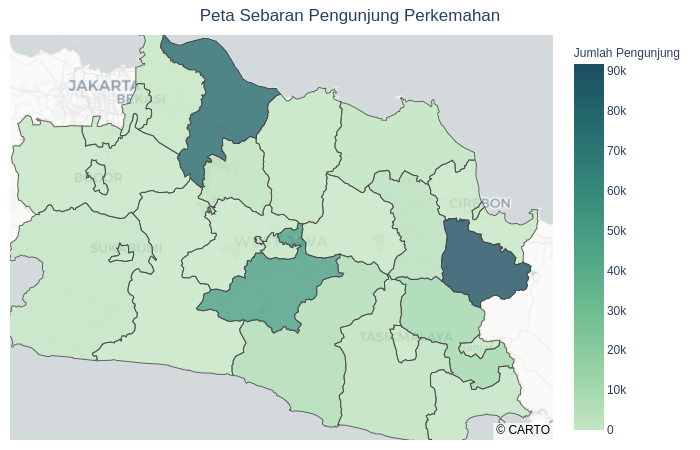

In [59]:
fig = px.choropleth_mapbox(map_data, geojson=west_java_geojson, locations='id',
                           color='jumlah_pengunjung',
                           color_continuous_scale="blugrn",
                           range_color=(0, int(map_data.jumlah_pengunjung.max())),
                           mapbox_style="carto-positron",
                           zoom=7.25, center = {"lat": -6.871893, "lon": 107.6455},
                           opacity=0.8,
                           hover_name='nama_kabupaten_kota',
                           hover_data=['id', 'jumlah_pengunjung'],
                           labels={'id': 'Id',
                                   'jumlah_pengunjung': 'Jumlah Pengunjung'}
                           )
fig.update_layout(title={'text':'Peta Sebaran Pengunjung Perkemahan',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":35,"l":10,"b":10},
                  width=100*10, height=100*5.5)
fig.show()

Grafik diatas merupakan peta sebaran jumlah pengunjung wisata perkemahan dari tiap Kabupaten dan Kota di Jawa Barat. Perubahan warna dari hijau muda ke hijau tua menunjukan jumlah pengunjung yang semakin meningkat. Dari peta sebaran di atas, kita mendapatkan tiga wilayah dengan jumlah pengunjung paling banyak, yaitu yang pertama adalah Kabupaten Kuningan dengan jumlah pengunjung sebanyak 91.776 orang, kedua adalah Kabupaten Karawang dengan jumlah pengunjung sebanyak 78.153 orang, dan ketiga adalah Kabupaten Bandung dengan jumlah pengunjung sebanyak 49.101 orang.

Peta Sebaran Tenaga Kerja

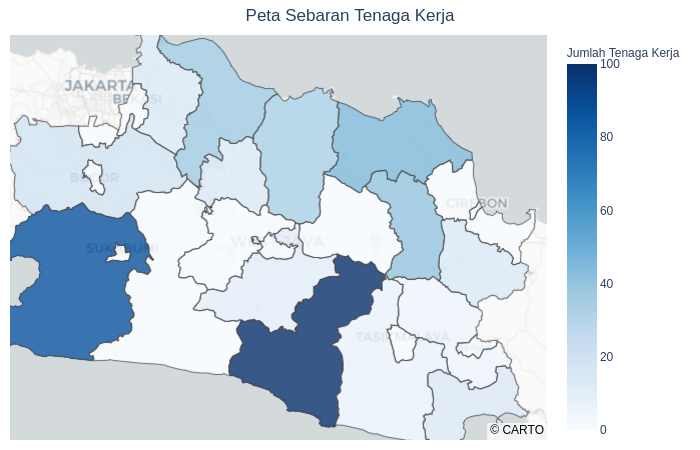

In [60]:
fig = px.choropleth_mapbox(map_data, geojson=west_java_geojson, locations='id',
                           color='jumlah_tenaga_kerja',
                           color_continuous_scale="blues",
                           range_color=(0, int(map_data.jumlah_tenaga_kerja.max())),
                           mapbox_style="carto-positron",
                           zoom=7.25, center = {"lat": -6.871893, "lon": 107.6455},
                           opacity=0.8,
                           hover_name='nama_kabupaten_kota',
                           hover_data=['id', 'jumlah_tenaga_kerja'],
                           labels={'id': 'Id',
                                   'jumlah_tenaga_kerja': 'Jumlah Tenaga Kerja'}
                           )
fig.update_layout(title={'text':'Peta Sebaran Tenaga Kerja',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":35,"l":10,"b":10},
                  width=100*10, height=100*5.5)
fig.show()

Grafik diatas merupakan peta sebaran jumlah tenaga kerja wisata perkemahan dari tiap Kabupaten dan Kota di Jawa Barat. Perubahan warna dari putih ke biru tua menunjukan jumlah tenaga kerja yang semakin meningkat. Dari peta sebaran di atas, kita mendapatkan tiga wilayah dengan jumlah tenaga kerja paling banyak, yaitu yang pertama adalah Kabupaten Garut dengan jumlah tenaga kerja sebanyak 100 orang, kedua adalah Kabupaten Sukabumi dengan jumlah tenaga kerja sebanyak 87 orang, dan ketiga adalah Kabupaten Indramayu dengan jumlah tenaga kerja sebanyak 45 orang.

### Persentase Wisatawan dan Tenaga Kerja

In [61]:
jenis_wisatawan = dat2_19.groupby('jenis_wisatawan').sum().reset_index()[['jenis_wisatawan', 'jumlah_pengunjung']]
jenis_pekerja = dat3_19.groupby('jenis_kelamin').sum().reset_index()[['jenis_kelamin', 'jumlah_tenaga_kerja']]

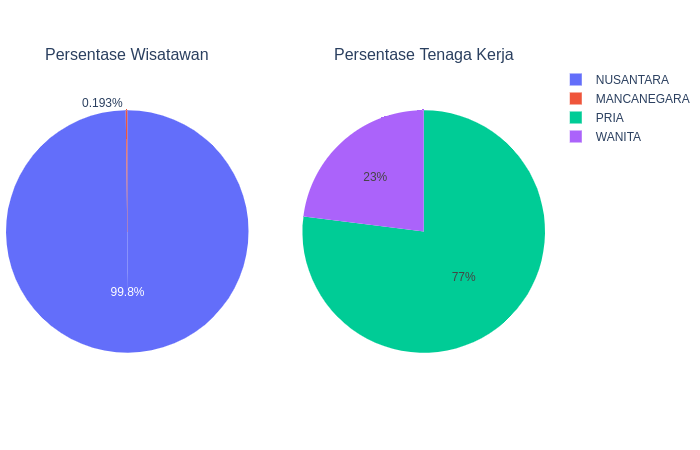

In [62]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Persentase Wisatawan", "Persentase Tenaga Kerja"))

fig.add_trace(go.Pie(values=jenis_wisatawan.jumlah_pengunjung,
                     labels=jenis_wisatawan.jenis_wisatawan,
                     name='Jenis Wisatawan'),
              row=1, col=1)

fig.add_trace(go.Pie(values=jenis_pekerja.jumlah_tenaga_kerja,
                     labels=jenis_pekerja.jenis_kelamin,
                     name='Jenis Kelamin'),
              row=1, col=2)

fig.update_layout(showlegend=True,
                  margin={"r":5,"t":5,"l":5,"b":5},
                  width=100*10, height=100*5)

fig.show()

Persentase wisatawan merupakan perbandingan jumlah pengunjung manca negara dengan jumlah pengunjung nusantara (dalam persen). Dapat kita lihat, bahwa industri parawisata perkemahan di Jawa Barat sebagian besarnya didominasi oleh pengunjung dari nusantara sebanyak 99.8% dan hanya sebagian kecil saja pengunjung dari mancanegara. 

Persentase tenaga kerja merupakan perbandingan jumlah tenaga kerja berdasarkan jenis kelamin. Seperti yang terlihat persentase tenaga kerja 77%-nya
didominasi oleh para pria dan 23%-nya adalah para wanita.

# **Analisis Wisata Perkemahan Pada Masa Pandemi Covid-19**

Pandemi Covig-19 di Indonesia terjadi di awal tahun 2020 dan masih terjadi sampai sekarang ini. Akibat dari pandemi ini, hampir semua sektor terkena dampaknya termasuk dalam sektor industri pariwisata perkemahan. Selama pandemi ini, pemerintah berusaha untuk mengatasi penyebaran virus covid-19 dengan cara memberlakukan kebijakan **Pembatasan Sosial Berskala Besar** (PSBB) dan **Pemberlakukan Pembatasan Kegiatan Masyarakat** (PPKM) sehingga para pelaku industri pariwisata harus ditutup dan kehilangan pengunjungnya. Akibat dari penutupan ini, masyarakat dan pekerja parawisata harus kehilangan mata pencahariannya.

Dalam analisis ini, sebenarnya tidak ada data pengunjung wisata perkemahan untuk tahun 2020 dan 2021 sehingga kita tidak bisa melihat lebih jauh pada datanya. Oleh karena itu, kami mengasumsikan bahwa selama pandami pada tahun 2020 dan 2021 tidak ada pengunjung yang datang dan juga sebagian tenaga kerjanya dirumahkan. Asumsi ini juga akan kami gunakan dalam pemodelan data sebagai pertimbangan untuk pengambilan keputusan pembukaan wisata perkemahan untuk tahun 2022 dan selanjutnya. Untuk mendukung asumsi tersebut kita akan melihat lebih jauh terhadap data perkembangan kasus Covid-19 dan vaksinasi.

## **Perkembangan Kasus Covid-19**

In [63]:
dat4 = pd.read_csv('/content/drive/MyDrive/TSDN 21/dataset/West Java Covid-19/satgas-covid-19-dp_cvd_agregat_kasus_terkonfirmasi_covid19_kabkota_jabar_data.csv')
dat4.drop(dat4.index[dat4['nama_kab_kota'] == 'jawa barat'], inplace=True)

Informasi penting yang diambil dari data covid-19 di atas adalah pertumbuhan harian terkonfirmasi positif, pertumbuhan harian sembuh dan pertumbuhan harian meninggal.

In [64]:
dat_cov = dat4[['tanggal', 'nama_kab_kota', 'konfirmasi_total_daily_growth', 
                'konfirmasi_sembuh_daily_growth', 'konfirmasi_meninggal_daily_growth']].copy()
dat_cov.tanggal = pd.to_datetime(dat_cov.tanggal)
dat_cov.set_index('tanggal', inplace=True)
dat_cov.nama_kab_kota = dat_cov.nama_kab_kota.str.upper()
kab_id = mk_dict(map_data, 'nama_kabupaten_kota', 'id')
dat_cov['id'] = dat_cov.nama_kab_kota.apply(lambda x: kab_id[x])
dat_cov.head()

,nama_kab_kota,konfirmasi_total_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth,id
tanggal,,,,,
2020-03-01,KABUPATEN BANDUNG,0.0,0.0,0.0,04
2020-03-01,KABUPATEN BANDUNG BARAT,0.0,0.0,0.0,17
2020-03-01,KABUPATEN BEKASI,0.0,0.0,0.0,16
2020-03-01,KABUPATEN BOGOR,0.0,0.0,0.0,01
2020-03-01,KABUPATEN CIAMIS,0.0,0.0,0.0,07


In [65]:
dat_cov.isnull().sum()

nama_kab_kota                        0
konfirmasi_total_daily_growth        0
konfirmasi_sembuh_daily_growth       0
konfirmasi_meninggal_daily_growth    0
id                                   0
dtype: int64

Peta Persebaran dan Pertumbuhan Covid-19 di Jawa Barat

In [66]:
cov_vis = dat_cov.groupby(pd.Grouper(freq='m')).sum()[:-1]

In [67]:
map_cov = dat_cov.loc['2021-09'].groupby('nama_kab_kota').sum().reset_index()
map_cov['id'] = map_cov.nama_kab_kota.apply(lambda x: kab_id[x])
map_cov.rename(columns={'konfirmasi_total_daily_growth':'konfirmasi_total', 
                        'konfirmasi_sembuh_daily_growth': 'konfirmasi_sembuh',
                        'konfirmasi_meninggal_daily_growth': 'konfirmasi_meninggal'},
               inplace=True)

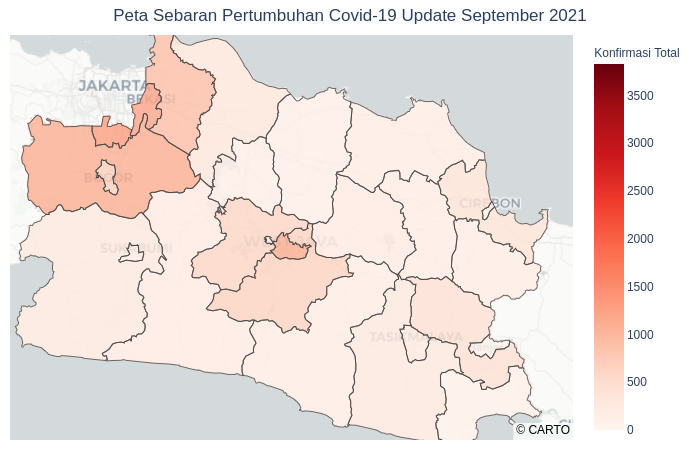

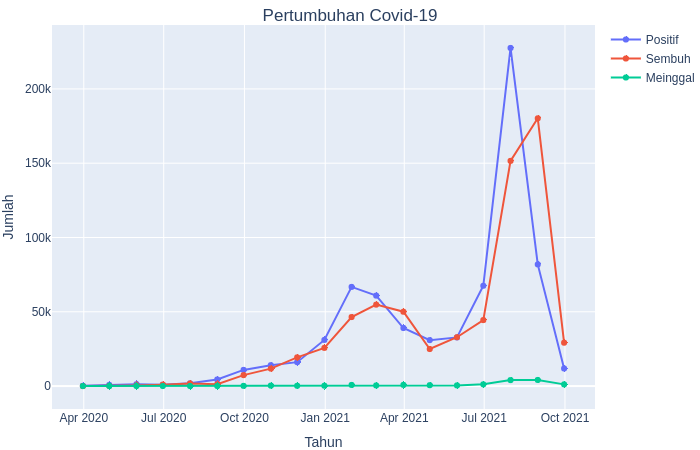

In [68]:
fig = px.choropleth_mapbox(map_cov, geojson=west_java_geojson, locations='id',
                           color='konfirmasi_total',
                           color_continuous_scale="reds",
                           range_color=(0, int(dat_cov.konfirmasi_total_daily_growth.max())),
                           mapbox_style="carto-positron",
                           zoom=7.25, center = {"lat": -6.871893, "lon": 107.6455},
                           opacity=0.8,
                           hover_name='nama_kab_kota',
                           hover_data=['id', 'konfirmasi_total', 'konfirmasi_sembuh'],
                           labels={'konfirmasi_total':'Konfirmasi Total',
                                   'konfirmasi_sembuh': 'Konfirmasi Sembuh'}
                           )
fig.update_layout(title={'text':'Peta Sebaran Pertumbuhan Covid-19 Update September 2021',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":35,"l":10,"b":10},
                  width=100*10, height=100*5.5)
fig.show()

fig = go.Figure(data=[
            go.Scatter(x=cov_vis.index, 
                       y=cov_vis.konfirmasi_total_daily_growth, 
                       name='Positif'),
            go.Scatter(x=cov_vis.index, 
                       y=cov_vis.konfirmasi_sembuh_daily_growth, 
                       name='Sembuh'),
            go.Scatter(x=cov_vis.index, 
                       y=cov_vis.konfirmasi_meninggal_daily_growth, 
                       name='Meinggal')])

fig.update_layout(title={'text':'Pertumbuhan Covid-19',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Tahun',
                  yaxis_title='Jumlah',
                  margin={"r":10,"t":25,"l":0,"b":0},
                  width=100*10, height=100*3)
fig.show()

Berdasarkan grafik di atas, ada lima wilayah yang termasuk kedalam zona merah dengan pertumbuhan kasus Covid-19 paling banyak per September 2021 diantaranya yaitu, Kota Depok dengan kasus positif Covid-19 sebanyak 1.305 orang, Kota Bekasi dengan kasus positif Covid-19 sebanyak 1.225 orang, Kabupaten Bogor dengan kasus positif Covid-19 sebanyak 1.112 orang, Kota Bandung dengan kasus positif Covid-19 sebanyak 1.111 orang, dan Kabupaten Bekasi dengan kasus positif Covid-19 sebanyak 912 orang.

Jika kita lihat pertumbuhan harian kasus Covid-19 dari awal pandemi sampai bulan September ini nampaknya sudah lebih baik dengan grafik pertumbuhan kasus positifnya menurun jika dibandingkan degan bulan sebelumnya.

Sekarang, Berapa banyak orang yang terkena kasus Covid-19 di Jawa Barat?

In [69]:
dat5 =  pd.read_excel('/content/drive/MyDrive/TSDN 21/dataset/West Java Population/Jumlah Penduduk Menurut Kabupaten_Kota.xlsx')

In [70]:
dat_pop = dat5.groupby('Tahun').sum().reset_index()
pop_cov = dat_pop.iloc[2:3].reset_index()
pop_cov['terkonfirmasi_positif'] = cov_vis.konfirmasi_total_daily_growth.sum()
pop_cov['terkonfirmasi_sembuh'] = cov_vis.konfirmasi_sembuh_daily_growth.sum()
pop_cov['terkonfirmasi_meninggal'] = cov_vis.konfirmasi_meninggal_daily_growth.sum()
pop_cov = pd.DataFrame(data={'Jenis': ['Unknown', 'Positif', 'Sembuh', 'Meninggal'], 
                             'Jumlah':[pop_cov.Populasi[0] - (pop_cov.terkonfirmasi_positif[0] + pop_cov.terkonfirmasi_sembuh[0] + pop_cov.terkonfirmasi_meninggal[0]),
                                       pop_cov.terkonfirmasi_positif[0],
                                       pop_cov.terkonfirmasi_sembuh[0],
                                       pop_cov.terkonfirmasi_meninggal[0]]})
dat_pop

,Tahun,Populasi
0,2018,48683861
1,2019,49316712
2,2020,49935858


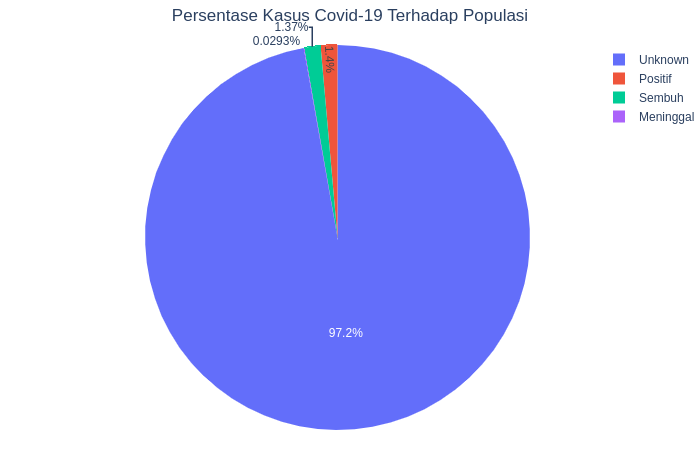

In [71]:
fig = go.Figure(data=[
            go.Pie(values=pop_cov.Jumlah, labels=pop_cov.Jenis)])

fig.update_layout(title={'text':'Persentase Kasus Covid-19 Terhadap Populasi',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":45,"l":10,"b":0},
                  width=100*5, height=100*5)
fig.show()

Dari grafik di atas kita tahu sekarang bahwa orang yang terkonfirmasi positif Covid-19 sebanyak 1.4% dari total pupulasi penduduk. Kemudian, orang yang sembuh dari Covid-19 sebanyak 1.37% dan meninggal 0.0293%. Meskipun jumlahnya terihat sangat kecil sekitar 1% tetapi ini sangat banyak bisa mencapai ratusan ribu orang karena populasi penduduk Jawa Barat ini mencapai 49 juta jiwa.

## **Distribusi Vaksin**

In [72]:
dat6 = pd.read_csv('/content/drive/MyDrive/TSDN 21/dataset/Vaksinasi West Java/Time_Series_Pelaksanaan_Vaksinasi_Pertama_Per_Prov_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (10,11,12,13,14,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.



In [73]:
dat_vac = dat6[['Tanggal', 'Kab/kota', 'Kategori', 'Divaksin 1', 'Divaksin 2']].copy()
dat_vac.Tanggal = pd.to_datetime(dat_vac.Tanggal)
dat_vac.set_index('Tanggal', inplace=True)

In [74]:
dat_vac.head()

,Kab/kota,Kategori,Divaksin 1,Divaksin 2
Tanggal,,,,
2021-07-01,Kab. Bekasi,BUMN,0,1
2021-07-01,Kota Bekasi,BUMN,4,4
2021-07-02,Kab. Cirebon,BUMN,1,0
2021-07-02,Kota Bekasi,BUMN,7,0
2021-07-03,Kab. Karawang,BUMN,1,0


In [75]:
dat_vac.isnull().sum()

Kab/kota      0
Kategori      0
Divaksin 1    0
Divaksin 2    0
dtype: int64

In [76]:
# Mengubah format Nama Kab/kota menjadi uppercase dan sesuai dengan dataset lainnya
a = dat_vac.sort_values('Kab/kota', ascending=True)['Kab/kota'].unique()
b = dat_cov.sort_values('nama_kab_kota', ascending=True)['nama_kab_kota'].unique()

for i in range(len(a)):
    dat_vac['Kab/kota'].replace({a[i]: b[i]}, inplace=True)

In [77]:
vac_vis = dat_vac.groupby(pd.Grouper(freq='m')).sum()[:-1]

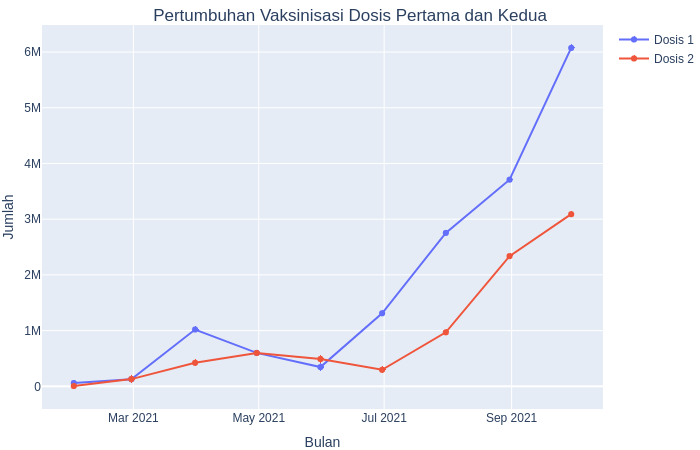

In [78]:
fig = go.Figure(data=[
            go.Scatter(x=vac_vis.index, 
                       y=vac_vis['Divaksin 1'], 
                       name='Dosis 1'),
            go.Scatter(x=vac_vis.index, 
                       y=vac_vis['Divaksin 2'], 
                       name='Dosis 2')])
fig.update_layout(title={'text':'Pertumbuhan Vaksinisasi Dosis Pertama dan Kedua',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Bulan',
                  yaxis_title='Jumlah',
                  margin={"r":10,"t":25,"l":0,"b":0},
                  width=100*10, height=100*3)
fig.show()

Terlihat dari grafik, dari bulan Juni 2021 pertumbuhan vaksinasi di Jawa Barat setiap bulanya terus meningkat. Pada bulan tersebut pertumbuhan kasus Covid-19 juga sedang meningkat. Dengan demikian, semakin banyaknya orang yang melakukan vaksinasi maka pertumbuhan Covid-19 tersebut dapat ditekan sehingga pertumbuhannya menurun di bulan Agustus 2021. 

Lalu bagaimana distribusi vaksin Covid-19 untuk setiap wilayah?


In [79]:
map_vac = dat_vac.groupby('Kab/kota').sum().reset_index()
map_vac['id'] = map_vac['Kab/kota'].apply(lambda x: kab_id[x])

In [80]:
vac_cate = dat_vac.groupby('Kategori').sum().sort_values('Divaksin 1', ascending=True)

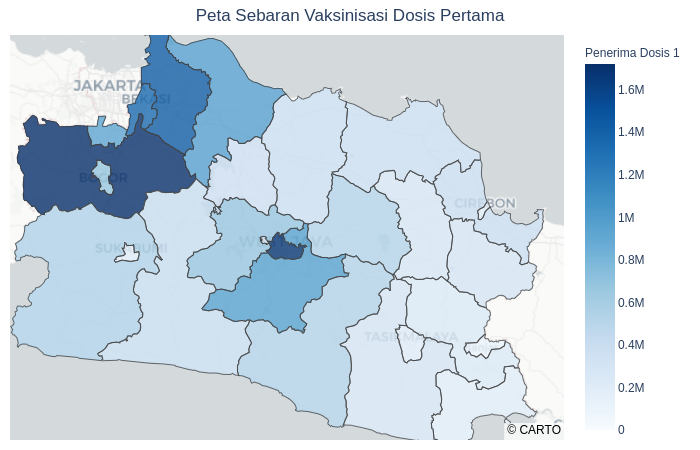

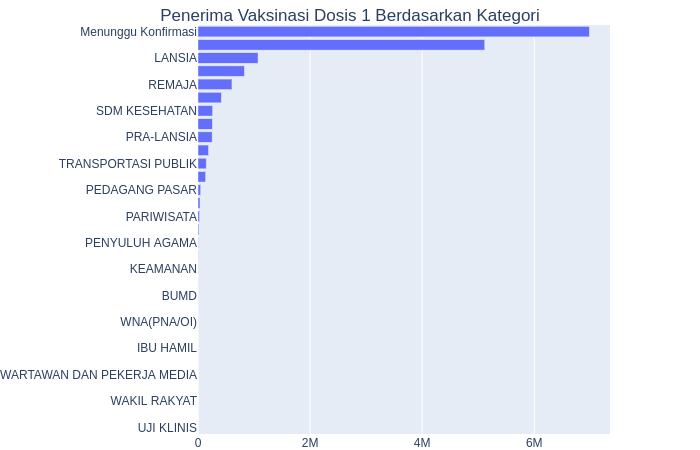

In [81]:
fig = px.choropleth_mapbox(map_vac, geojson=west_java_geojson, locations='id',
                           color='Divaksin 1',
                           color_continuous_scale="blues",
                           range_color=(0, int(map_vac['Divaksin 1'].max())),
                           mapbox_style="carto-positron",
                           zoom=7.25, center = {"lat": -6.871893, "lon": 107.6455},
                           opacity=0.8,
                           hover_name='Kab/kota',
                           hover_data=['id', 'Divaksin 1', 'Divaksin 2'],
                           labels={'Divaksin 1': 'Penerima Dosis 1',
                                   'Divaksin 2': 'Penerima Dosis 2'}
                           )
fig.update_layout(title={'text':'Peta Sebaran Vaksinisasi Dosis Pertama',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":35,"l":10,"b":10},
                  width=100*10, height=100*5.5)
fig.show()

fig = go.Figure(data=[go.Bar(x=vac_cate['Divaksin 1'], y=vac_cate.index, orientation='h')])
fig.update_layout(title={'text':'Penerima Vaksinasi Dosis 1 Berdasarkan Kategori',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":90,"t":25,"l":0,"b":0},
                  width=100*10, height=100*6)
fig.show()

Dari peta sebaran di atas, diketahui bahwa distribusi vaksin Covid-19 paling banyak dilakukan di kota-kota besar seperti di Kabupaten Bogor, Kabupaten dan Kota Bandung, Kabupaten dan Kota Bekasi, serta Kabupaten Karawang dengan jumlah penerima paling banyak dari masyarakat umum, kemudian lansia dan pelayan publik.

Berapa banyak orang yang sudah melakukan vaksin dosisi pertama dari total populasi?

In [82]:
pop_vac = dat_pop.iloc[2:3].reset_index()
pop_vac['Sudah Divaksin'] = vac_vis['Divaksin 1'].sum()
pop_vac = pd.DataFrame(data={'Jenis': ['Belum Divaksin', 'Sudah Divaksin'], 
                             'Jumlah':[pop_vac.Populasi[0]-pop_vac['Sudah Divaksin'][0], 
                                       pop_vac['Sudah Divaksin'][0]]})

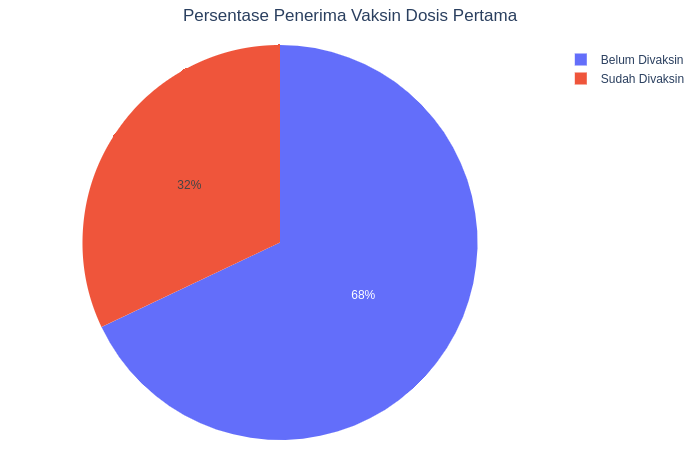

In [83]:
fig = go.Figure(data=[
            go.Pie(values=pop_vac.Jumlah, labels=pop_vac.Jenis)])

fig.update_layout(title={'text':'Persentase Penerima Vaksin Dosis Pertama',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":45,"l":10,"b":10},
                  width=100*5, height=100*5)
fig.show()

Pemerintah Jawa Barat menargetkan 70% warganya untuk melakukan vaksinasi, sampai bulan September ini target vaksinasi baru bisa mencapai 32%.